In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import zip_longest
import glob
from openpyxl.utils.dataframe import dataframe_to_rows

In [ ]:
# zip vs zip_longest

In [4]:
a=['A','B','C','D']
b=[1,2,3]

In [6]:
list(zip(a,b))

[('A', 1), ('B', 2), ('C', 3)]

In [7]:
list(zip_longest(a,b))

[('A', 1), ('B', 2), ('C', 3), ('D', None)]

In [9]:
list(zip_longest(a,b,fillvalue=9999))

[('A', 1), ('B', 2), ('C', 3), ('D', 9999)]

In [ ]:
# glob

In [7]:
path=glob.glob(f'tip*{2024}.xlsx')[0]
path

<IPython.core.display.Javascript object>

'tip_November_2024.xlsx'

In [8]:
tip=pd.read_excel(path)
tip.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
yr=2023
fr"C:\Users\Rinesh\Documents\ITR 2023_2024\taxpnl-MB2664-{yr}_2024-Q1-Q4.xlsx"

'C:\\Users\\Rinesh\\Documents\\ITR 2023_2024\\taxpnl-MB2664-2023_2024-Q1-Q4.xlsx'

In [ ]:
# Pivot table

In [34]:
year=2024
pd.pivot_table(index='sex',columns='size',values='total_bill',aggfunc='sum',data=tip,margins=True,margins_name=f'{year}_total')

size,1,2,3,4,5,6,2024_total
sex,,,,,,,
Female,20.39,889.69,301.66,272.51,29.85,56.85,1570.95
Male,8.58,1676.20,582.89,786.19,120.49,82.47,3256.82
2024_total,28.97,2565.89,884.55,1058.70,150.34,139.32,4827.77


In [ ]:
# Modulus

In [35]:
-2%12

10

In [36]:
-5%7

2

In [ ]:
# Filter

In [38]:
import calendar

In [39]:
list(filter(None,calendar.month_abbr))

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [41]:
l1=[1,4,6,7,np.nan]
l1

[1, 4, 6, 7, nan]

In [44]:
list(filter(lambda x: x is not np.nan,l1))

[1, 4, 6, 7]

In [ ]:
# Map

In [45]:
tip.dtypes

Unnamed: 0      int64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [48]:
tip['size']=tip['size'].map(lambda x : str(x))

In [49]:
tip.dtypes

Unnamed: 0      int64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size           object
dtype: object

In [ ]:
# str concat

In [51]:
tip['sex'].str.cat(tip['smoker'],sep='_')

0       Female_No
1         Male_No
2         Male_No
3         Male_No
4       Female_No
          ...    
239       Male_No
240    Female_Yes
241      Male_Yes
242       Male_No
243     Female_No
Name: sex, Length: 244, dtype: object

In [ ]:
# Join

In [60]:
df1=pd.DataFrame({'A':[1,3,5,8,9],'B':[23,67,98,78,90]})
df2=pd.DataFrame({'A':[1,2,5,8,7],'C':[238,800,989,780,900]})

In [61]:
pd.merge(df1,df2,on='A')

,A,B,C
0,1,23,238
1,5,98,989
2,8,78,780


In [62]:
df2=df2.set_index('A')
df2

,C
A,
1,238
2,800
5,989
8,780
7,900


In [65]:
pd.merge(df1,df2,on='A')

,A,B,C
0,1,23,238
1,5,98,989
2,8,78,780


In [70]:
pd.read_excel('tip_November_2024.xlsx',skiprows=1)

,0,16.99,1.01,Female,No,Sun,Dinner,2
0,1,10.34,1.66,Male,No,Sun,Dinner,3
1,2,21.01,3.50,Male,No,Sun,Dinner,3
2,3,23.68,3.31,Male,No,Sun,Dinner,2
3,4,24.59,3.61,Female,No,Sun,Dinner,4
4,5,25.29,4.71,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
238,239,29.03,5.92,Male,No,Sat,Dinner,3
239,240,27.18,2.00,Female,Yes,Sat,Dinner,2
240,241,22.67,2.00,Male,Yes,Sat,Dinner,2
241,242,17.82,1.75,Male,No,Sat,Dinner,2


In [76]:
tip.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [75]:
for i in enumerate(tip.tip,4):
    print(i)

(4, 1.01)
(5, 1.66)
(6, 3.5)
(7, 3.31)
(8, 3.61)
(9, 4.71)
(10, 2.0)
(11, 3.12)
(12, 1.96)
(13, 3.23)
(14, 1.71)
(15, 5.0)
(16, 1.57)
(17, 3.0)
(18, 3.02)
(19, 3.92)
(20, 1.67)
(21, 3.71)
(22, 3.5)
(23, 3.35)
(24, 4.08)
(25, 2.75)
(26, 2.23)
(27, 7.58)
(28, 3.18)
(29, 2.34)
(30, 2.0)
(31, 2.0)
(32, 4.3)
(33, 3.0)
(34, 1.45)
(35, 2.5)
(36, 3.0)
(37, 2.45)
(38, 3.27)
(39, 3.6)
(40, 2.0)
(41, 3.07)
(42, 2.31)
(43, 5.0)
(44, 2.24)
(45, 2.54)
(46, 3.06)
(47, 1.32)
(48, 5.6)
(49, 3.0)
(50, 5.0)
(51, 6.0)
(52, 2.05)
(53, 3.0)
(54, 2.5)
(55, 2.6)
(56, 5.2)
(57, 1.56)
(58, 4.34)
(59, 3.51)
(60, 3.0)
(61, 1.5)
(62, 1.76)
(63, 6.73)
(64, 3.21)
(65, 2.0)
(66, 1.98)
(67, 3.76)
(68, 2.64)
(69, 3.15)
(70, 2.47)
(71, 1.0)
(72, 2.01)
(73, 2.09)
(74, 1.97)
(75, 3.0)
(76, 3.14)
(77, 5.0)
(78, 2.2)
(79, 1.25)
(80, 3.08)
(81, 4.0)
(82, 3.0)
(83, 2.71)
(84, 3.0)
(85, 3.4)
(86, 1.83)
(87, 5.0)
(88, 2.03)
(89, 5.17)
(90, 2.0)
(91, 4.0)
(92, 5.85)
(93, 3.0)
(94, 3.0)
(95, 3.5)
(96, 1.0)
(97, 4.3)
(98, 3.25)
(9

In [ ]:
### openpyxl

In [28]:
from openpyxl import Workbook
wb = Workbook()

# grab the active worksheet
ws = wb.active

# Data can be assigned directly to cells
ws['A1'] = 42

# Rows can also be appended
ws.append([1, 2, 3])

# Python types will automatically be converted
import datetime
ws['A2'] = datetime.datetime.now()

# Save the file
wb.save("sample.xlsx")


In [92]:
from openpyxl import Workbook
wb = Workbook()

# grab the active worksheet
ws = wb.active

In [96]:
tip.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [103]:
for i,k in enumerate(tip.columns,1):
    for j,l in enumerate(tip[k],1):
        ws.cell(row=j,column=i,value=l)

In [104]:
wb.save('sample1.xlsx')

In [108]:
pd.read_excel('sample1.xlsx')

,0,16.99,1.01,Female,No,Sun,Dinner,2,Unnamed: 8
0,1.0,10.34,1.66,Male,No,Sun,Dinner,3,2
1,2.0,21.01,3.50,Male,No,Sun,Dinner,3,3
2,3.0,23.68,3.31,Male,No,Sun,Dinner,2,3
3,4.0,24.59,3.61,Female,No,Sun,Dinner,4,2
4,5.0,25.29,4.71,Male,No,Sun,Dinner,4,4
...,...,...,...,...,...,...,...,...,...
239,240.0,27.18,2.00,Female,Yes,Sat,Dinner,2,3
240,241.0,22.67,2.00,Male,Yes,Sat,Dinner,2,2
241,242.0,17.82,1.75,Male,No,Sat,Dinner,2,2
242,243.0,18.78,3.00,Female,No,Thur,Dinner,2,2


In [102]:
import os
os.remove("sample1.xlsx")

In [124]:
tip['time'].sum()

'DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerD

In [126]:
str1='Hello'
list(str1)

['H', 'e', 'l', 'l', 'o']

In [127]:
tip.shape

(244, 8)

In [132]:
tip.loc[tip.total_bill.duplicated()]

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
63,63,18.29,3.76,Male,Yes,Sat,Dinner,4
76,76,17.92,3.08,Male,Yes,Sat,Dinner,2
98,98,21.01,3.00,Male,Yes,Fri,Dinner,2
136,136,10.33,2.00,Female,No,Thur,Lunch,2
163,163,13.81,2.00,Male,No,Sun,Dinner,2
172,172,7.25,5.15,Male,Yes,Sun,Dinner,2
185,185,20.69,5.00,Male,No,Sun,Dinner,5
196,196,10.34,2.00,Male,Yes,Thur,Lunch,2
202,202,13.00,2.00,Female,Yes,Thur,Lunch,2


In [133]:
tip.query('total_bill== 20.29')

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
21,21,20.29,2.75,Female,No,Sat,Dinner,2
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2


In [134]:
tip.query('sex== "Male"')

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...,...
236,236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,239,29.03,5.92,Male,No,Sat,Dinner,3
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [149]:
tip.time.map({'Dinner':'D','Luunch':'L'})

0      D
1      D
2      D
3      D
4      D
      ..
239    D
240    D
241    D
242    D
243    D
Name: time, Length: 244, dtype: object

In [10]:
tip.dtypes

Unnamed: 0      int64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [13]:
tip['day']=tip['day'].astype('category')

In [18]:
tip['day'].head()

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
Name: day, dtype: category
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']

In [14]:
tip.dtypes

Unnamed: 0       int64
total_bill     float64
tip            float64
sex             object
smoker          object
day           category
time            object
size             int64
dtype: object

In [16]:
tip['day'].cat.rename_categories(['Fr','St','Su','Th'])

0      Su
1      Su
2      Su
3      Su
4      Su
       ..
239    St
240    St
241    St
242    St
243    Th
Name: day, Length: 244, dtype: category
Categories (4, object): ['Fr', 'St', 'Su', 'Th']

In [19]:
tip['day'].cat.rename_categories([5,6,7,4])

0      7
1      7
2      7
3      7
4      7
      ..
239    6
240    6
241    6
242    6
243    4
Name: day, Length: 244, dtype: category
Categories (4, int64): [5, 6, 7, 4]

In [29]:
pd.cut(tip['total_bill'],bins=5).head()

<IPython.core.display.Javascript object>

0    (12.618, 22.166]
1     (3.022, 12.618]
2    (12.618, 22.166]
3    (22.166, 31.714]
4    (22.166, 31.714]
Name: total_bill, dtype: category
Categories (5, interval[float64, right]): [(3.022, 12.618] < (12.618, 22.166] < (22.166, 31.714] < (31.714, 41.262] < (41.262, 50.81]]

In [35]:
pd.cut(tip['total_bill'],bins=[0,10,20,30,40,float('inf')]).dtypes

<IPython.core.display.Javascript object>

CategoricalDtype(categories=[(0.0, 10.0], (10.0, 20.0], (20.0, 30.0], (30.0, 40.0], (40.0, inf]], ordered=True)

<AxesSubplot:>

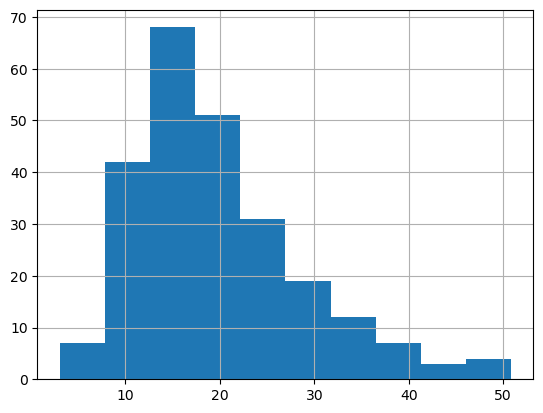

In [22]:
tip['total_bill'].hist()